In [145]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("results_1000.csv", names=["h2s", "i", "k", "method", "n_causals", "svm", "lr"])
df

,h2s,i,k,method,n_causals,svm,lr
1.0,0.3,10,5,ae,0,0.537736,0.677696
1.0,0.3,10,25,ae,2,0.656998,0.740636
1.0,0.3,10,100,ae,2,0.710786,0.718952
1.0,0.3,10,300,ae,4,0.700648,0.739792
1.0,0.3,10,5,p,0,0.487750,0.587159
...,...,...,...,...,...,...,...
1.0,0.7,9,25,hsic,3,0.741092,0.899038
1.0,0.7,9,5,ln,2,0.407381,0.842336
1.0,0.7,9,25,ln,3,0.709276,0.925905
1.0,0.7,9,100,ln,5,0.815611,0.878959


In [143]:
df_10k = pd.read_csv("results_10000.csv", names=["h2s", "i", "k", "method", "n_causals", "svm", "lr"])
df_10k

,h2s,i,k,method,n_causals,svm,lr
0,0.3,10,5,ln,2,0.581949,0.652211
1,0.3,10,25,ln,3,0.607012,0.617009
2,0.3,10,100,ln,3,0.530836,0.583779
3,0.3,10,300,ln,3,0.592791,0.652774
4,0.3,10,5,ae,0,0.521262,0.520698
...,...,...,...,...,...,...,...
1060,0.7,9,25,hsic,3,0.615234,0.822824
1061,0.7,9,5,ln,2,0.602818,0.749302
1062,0.7,9,25,ln,7,0.726004,0.819196
1063,0.7,9,100,ln,8,0.702846,0.818080


In [184]:
df_3k = pd.read_csv("results_3000.csv", names=["h2s", "i", "k", "method", "n_causals", "svm", "lr"])
df_3k

,h2s,i,k,method,n_causals,svm,lr
0,0.3,10,5,ae,1,0.417649,0.660073
1,0.3,10,5,hsic,1,0.465629,0.696268
2,0.3,10,5,ln,1,0.458053,0.698232
3,0.3,10,5,p,1,0.440657,0.712262
4,0.3,10,25,ae,1,0.591190,0.726150
...,...,...,...,...,...,...,...
1057,0.7,9,100,ln,5,0.835398,0.911856
1058,0.7,9,100,p,4,0.807378,0.895804
1059,0.7,9,300,ae,4,0.893551,0.910729
1060,0.7,9,300,ln,5,0.885384,0.910448


In [ ]:
df

In [104]:
df_10k.query("method == 'ln'").query("i == 12 and h2s in [0.3, 0.7]")

,h2s,i,k,method,n_causals,svm,lr
28,0.3,12,5,ln,2,0.548804,0.685345
746,0.7,12,5,ln,3,0.482356,0.786330


In [185]:
df_3k.groupby("method").count()

,h2s,i,k,n_causals,svm,lr
method,,,,,,
ae,300,300,300,300,300,300
hsic,162,162,162,162,162,162
ln,300,300,300,300,300,300
p,300,300,300,300,300,300


In [170]:
df_10k.query("method == 'ln'").groupby(["k", "h2s"]).count()

i  method  n_causals  svm  lr
k   h2s                                
5   0.3  25      25         25   25  25
    0.5  25      25         25   25  25
    0.7  25      25         25   25  25
25  0.3  25      25         25   25  25
    0.5  25      25         25   25  25
    0.7  25      25         25   25  25
100 0.3  25      25         25   25  25
    0.5  25      25         25   25  25
    0.7  25      25         25   25  25
300 0.3  25      25         25   25  25
    0.5  25      25         25   25  25
    0.7  25      25         25   25  25

In [5]:
from scipy.stats import wilcoxon

wilcoxon(df[""])

<function scipy.stats.morestats.wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', mode='auto')>

In [10]:
p_svm = df.query("method == 'p'")
ln_svm = df.query("method == 'ln'")

In [28]:
grouped = df.groupby(["h2s", "k"])

wc = []

for (h2s, k), split in grouped:
    p = split.query("method == 'p'")["n_causals"]
    ln = split.query("method == 'ln'")["n_causals"]
    
    w = wilcoxon(p, ln)
    print(h2s, k, w[0], w[1])

0.3 5 7.0 0.2059032107320684
0.3 25 12.0 0.0015319225485300751
0.3 100 43.5 0.005649922330574706
0.3 300 41.5 0.2757631619282719
0.5 5 9.0 0.0011127245264545634
0.5 25 10.0 0.0008027832324003827
0.5 100 24.0 0.001450350792478768
0.5 300 53.0 0.41438899196651724
0.7 5 0.0 0.00012229251759941288
0.7 25 0.0 2.2313491612724624e-05
0.7 100 3.0 1.9998945106463238e-05
0.7 300 55.0 0.03133172167191915


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
p_300 v.s. ln_300: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.885e-06 stat=4.710e+02
Using zero_method  wilcox
p_100 v.s. ln_100: Wilcoxon test (paired samples) with Bonferroni correction, P_val=8.045e-12 stat=9.300e+01
Using zero_method  wilcox
p_25 v.s. ln_25: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.870e-04 stat=6.540e+02
Using zero_method  wilcox
p_5 v.s. ln_5: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.381e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
p_300 v.s. ln_300: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.885e-06 stat=4.710e+02
Usi

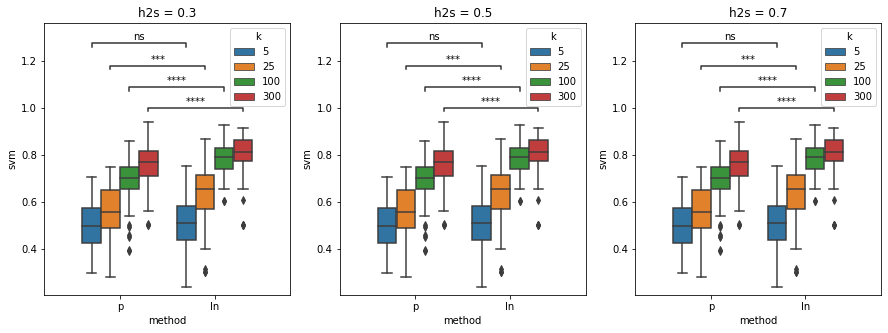

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

dff = df.query("method in ['ln', 'p']")

for h2s, ax in zip([0.3, 0.5, 0.7], axes):
    plt.sca(ax)
    sns.boxplot(x=dff["method"], y=dff["svm"], hue=dff["k"])
    
    test_results = add_stat_annotation(ax, x=dff["method"], y=dff["svm"], hue=dff["k"],
                                   box_pairs=[
                                       (("ln", 300), ("p", 300)),
                                       (("ln", 100), ("p", 100)),
                                       (("ln", 25), ("p", 25)),
                                       (("ln", 5), ("p", 5))
                                   ],
                                   test='Wilcoxon', text_format='star',
                                   loc='inside', verbose=2)
    plt.title(f"h2s = {h2s}")
plt.savefig("wilc.jpeg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
p v.s. ln: Wilcoxon test (paired samples) with Bonferroni correction, P_val=9.721e-01 stat=1.381e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
p v.s. ln: Wilcoxon test (paired samples) with Bonferroni correction, P_val=9.721e-01 stat=1.381e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
p v.s. ln: Wilcoxon test (paired samples) with Bonferroni correction, P_val=9.721e-01 stat=1.381e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 

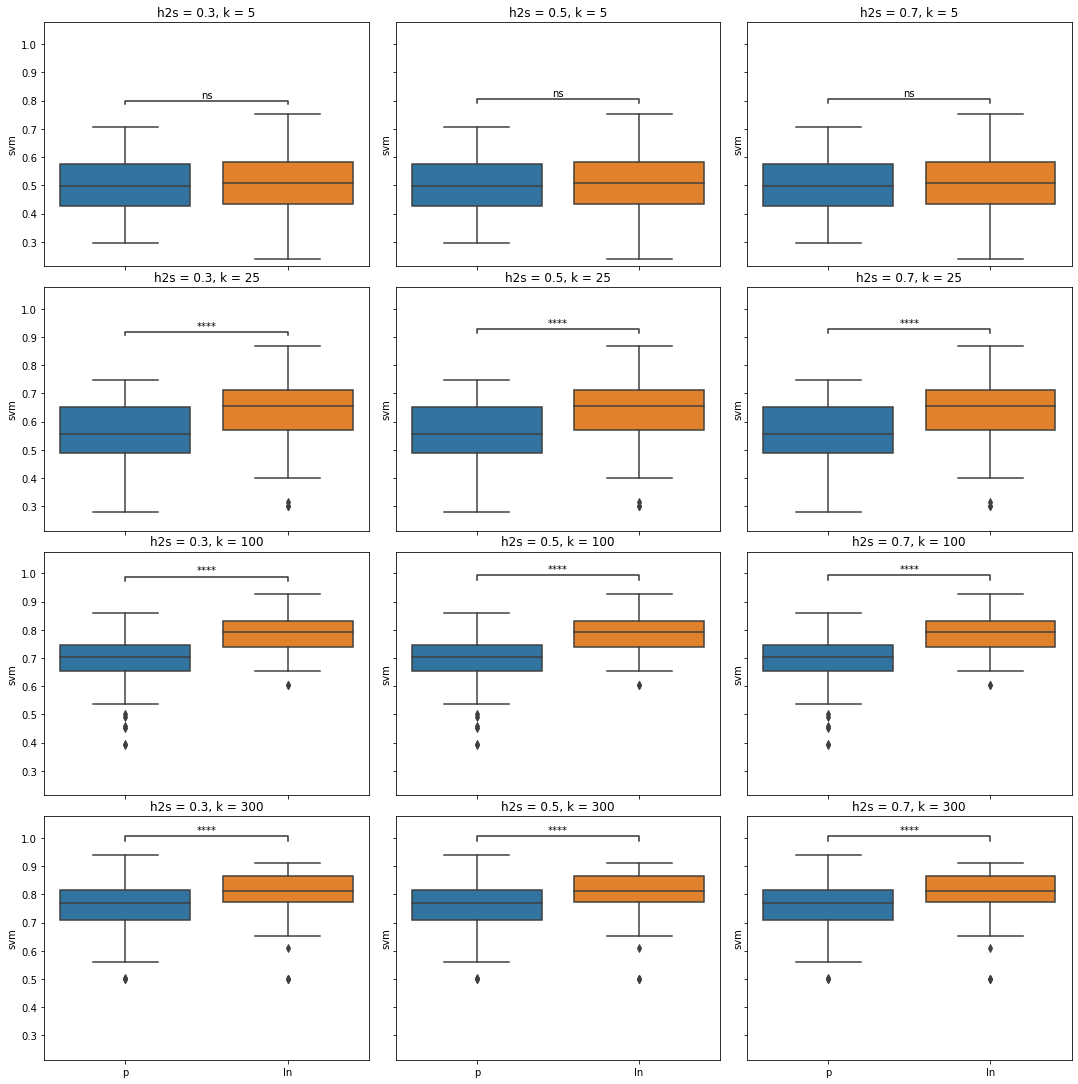

In [77]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
from itertools import product
dff = df.query("method in ['ln', 'p']")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k}")
    
    sns.boxplot(x=dfff["method"], y=dfff["svm"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(ax, x=dfff["method"], y=dfff["svm"],
                                   box_pairs=[
                                       ("ln", "p")
                                   ],
                                   test='Wilcoxon', text_format='star',
                                   loc='inside', verbose=1)
    plt.title(f"h2s = {h2s}, k = {k}")
plt.savefig("wilc_split.jpeg")

In [44]:
from statannot import add_stat_annotation

In [71]:
from FADS.utils import mkoutdir

mkoutdir("results", h2s=[0.3, 0.5, 0.7], sim=range(1, 26))

In [65]:
np.unique(df["h2s"])

array([0.3, 0.5, 0.7])

In [66]:
df["n_causals"]

0       1
1       1
2       1
3       1
4       1
       ..
1053    5
1054    4
1055    4
1056    5
1057    5
Name: n_causals, Length: 1058, dtype: int64

In [4]:
df.groupby(["k", "method"]).count()

h2s   i  n_causals  svm  lr
k   method                             
5   ae       75  75         75   75  75
    hsic     75  75         75   75  75
    ln       75  75         75   75  75
    p        75  75         75   75  75
25  ae       75  75         75   75  75
    hsic     72  72         72   72  72
    ln       75  75         75   75  75
    p        75  75         75   75  75
100 ae       75  75         75   75  75
    hsic     17  17         17   17  17
    ln       75  75         75   75  75
    p        75  75         75   75  75
300 ae       75  75         75   75  75
    ln       75  75         75   75  75
    p        75  75         75   75  75

ae
hsic
ln
p


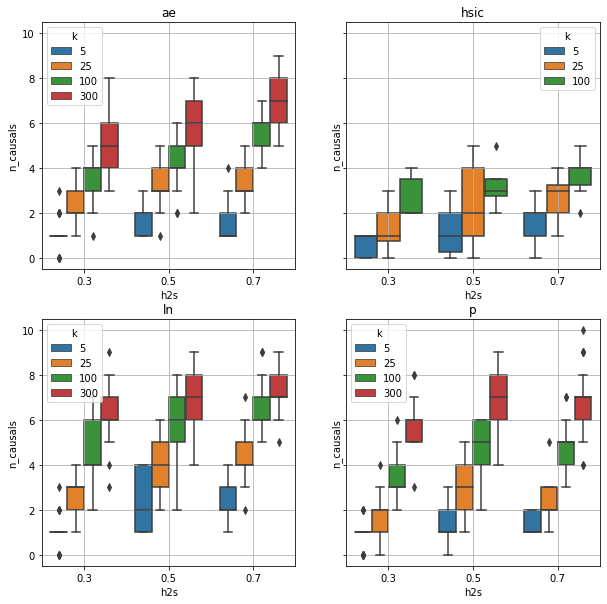

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for method, ax in zip(np.unique(df["method"]), axes.ravel()):
    print(method)
    plt.sca(ax)
    sns.boxplot(x="h2s", y="n_causals", hue="k", data=df.query(f"method == '{method}'"))
    plt.title(method)
    plt.grid()


ae
hsic
ln
p


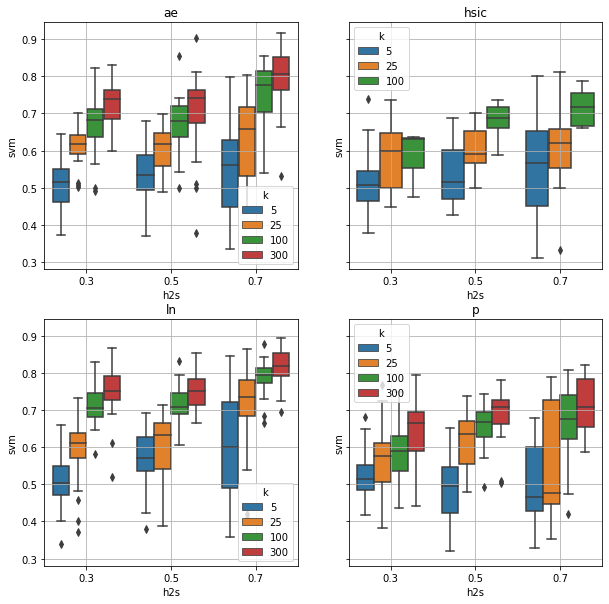

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for method, ax in zip(np.unique(df["method"]), axes.ravel()):
    print(method)
    plt.sca(ax)
    sns.boxplot(x="h2s", y="svm", hue="k", data=df.query(f"method == '{method}'"))
    plt.title(method)
    plt.grid()


In [183]:
df

h2s   i  n_causals       svm        lr
k   method                                        
5   ae      0.7  14          2  0.335325  0.776304
    hsic    0.7  14          2  0.389974  0.795978
    ln      0.7  14          3  0.404693  0.808073
    p       0.7  14          1  0.442582  0.735208
25  ae      0.7  14          4  0.657826  0.833285
    hsic    0.7  14          2  0.611192  0.814923
    ln      0.7  14          4  0.773827  0.859808
    p       0.7  14          3  0.361994  0.804430
100 ae      0.7  14          4  0.791023  0.848441
    hsic    0.7  14          2  0.788400  0.834451
    ln      0.7  14          6  0.837074  0.861556
    p       0.7  14          3  0.545322  0.842320
300 ae      0.7  14          4  0.816380  0.880501
    ln      0.7  14          7  0.832119  0.848441
    p       0.7  14          4  0.695716  0.867094

In [182]:
import glob
files = glob.glob("results/results_3000/h2s_*/sim_*/n_causals.csv")

for file in files:
    df = pd.read_csv(file, names=["h2s", "i", "k", "method", "n_causals", "svm", "lr"]).groupby(["k", "method"]).last()
    print(df)
    df[["h2s", "i", "k", "method", "n_causals", "svm", "lr"]].to_csv(file[:-4] + "1.csv", index=False, header=False)

            h2s   i  n_causals       svm        lr
k   method                                        
5   ae      0.5  12          0  0.482481  0.507230
    hsic    0.5  12          1  0.447442  0.654616
    ln      0.5  12          2  0.657119  0.766407
    p       0.5  12          1  0.396691  0.635845
25  ae      0.5  12          0  0.558954  0.768632
    hsic    0.5  12          2  0.570078  0.794772
    ln      0.5  12          4  0.665740  0.822303
    p       0.5  12          4  0.650862  0.831062
100 ae      0.5  12          2  0.725806  0.809511
    ln      0.5  12          5  0.721079  0.824527
    p       0.5  12          5  0.626529  0.832036
300 ae      0.5  12          3  0.757786  0.839544
    ln      0.5  12          6  0.796440  0.849555
    p       0.5  12          5  0.646274  0.834816
            h2s  i  n_causals       svm        lr
k   method                                       
5   ae      0.5  5          1  0.569980  0.648831
    hsic    0.5  5          1  0.6

In [177]:
file[:-4]

'results/results_3000/h2s_0.7/sim_14/n_causals'

In [41]:
for file in files:
    df = pd.read_csv(file, names=["h2s", "i", "k", "method", "n_causals", "svm", "lr"]).groupby(["k", "method"]).last().reset_index()

In [42]:
df

,k,method,h2s,i,n_causals,svm,lr
0,5,ae,0.7,14,2,0.335325,0.776304
1,5,hsic,0.7,14,2,0.389974,0.795978
2,5,ln,0.7,14,3,0.404693,0.808073
3,5,p,0.7,14,1,0.442582,0.735208
4,25,ae,0.7,14,4,0.657826,0.833285
5,25,hsic,0.7,14,2,0.611192,0.814923
6,25,ln,0.7,14,4,0.773827,0.859808
7,25,p,0.7,14,3,0.361994,0.804430
8,100,ae,0.7,14,4,0.791023,0.848441
9,100,hsic,0.7,14,2,0.788400,0.834451
